In [9]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import ticker


In [10]:
# Load the CSV file
file_path = '../experiment_progress_vgg16.csv'
data = pd.read_csv(file_path)

In [11]:
# Set global plot style settings
plt.rcParams['axes.grid'] = False  # Disable grid for all plots
plt.rcParams['axes.facecolor'] = 'white'  # Set background color to white
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white
sns.set_style("white")  # Use Seaborn's white style to remove spines by default
sns.despine()  # Remove all spines globally

<Figure size 640x480 with 0 Axes>

# Scheduling decision for VGG16

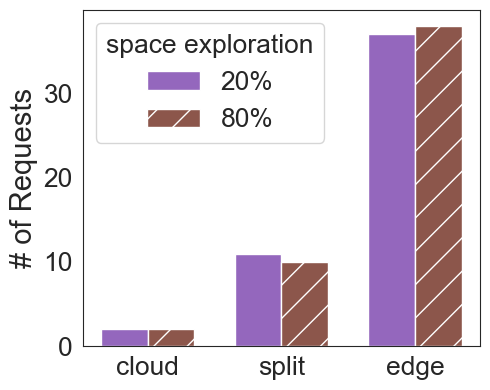

In [12]:
# Filter rows for both strategies
splinter_latency_data = data[data['strategy'] == 'splinter:latency'].copy()
splinter_latency_exhaustive_data = data[data['strategy'] == 'splinter:latency_exhaustive'].copy()

# Add a new 'type' column based on the 'layer' column for both strategies
splinter_latency_data['type'] = splinter_latency_data['layer'].apply(
    lambda x: 'cloud' if x == 0 else ('edge' if x == 22 else 'split')
)
splinter_latency_exhaustive_data['type'] = splinter_latency_exhaustive_data['layer'].apply(
    lambda x: 'cloud' if x == 0 else ('edge' if x == 22 else 'split')
)

# Count the occurrences of each type for both strategies
splinter_latency_counts = splinter_latency_data['type'].value_counts()
splinter_latency_exhaustive_counts = splinter_latency_exhaustive_data['type'].value_counts()

count_df = pd.DataFrame({
    'splinter:latency': splinter_latency_counts,
    'splinter:latency_exhaustive': splinter_latency_exhaustive_counts
}).fillna(0)  # Fill NaN values with 0

# Reorder to 'cloud', 'split', 'edge'
count_df = count_df.reindex(['cloud', 'split', 'edge'])

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Initialize figure for the bar plot
fig, ax = plt.subplots(figsize=(5, 4))

# Width and position adjustment for grouped bars
width = 0.35
x = range(len(count_df.index))

# Plot each strategy with offset for grouping
ax.bar([i - width / 2 for i in x], count_df['splinter:latency'],
       width=width, color='tab:purple', label='20%')
ax.bar([i + width / 2 for i in x], count_df['splinter:latency_exhaustive'],
       width=width, color='tab:brown', hatch='/', label='80%')

# Setting labels, ticks, and legend
ax.set_ylabel("# of Requests", fontsize=label_font_size)
ax.set_xticks(x)
ax.set_xticklabels(count_df.index, rotation=0, fontsize=tick_font_size)
ax.tick_params(axis='both', labelsize=tick_font_size)
ax.legend(fontsize=legend_font_size, title_fontsize=legend_font_size, title='space exploration')

# Layout adjustments and display
fig.tight_layout()
plt.savefig('splinter_decision_vgg16.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# Average Latency

In [13]:
# Replace 'splinter:latency' with 'splinter' in the data
data['strategy'] = data['strategy'].replace({'splinter:latency': 'splinter'})
data = data[data['strategy'] != 'splinter:latency_exhaustive']

C:\Users\danie\AppData\Local\Temp\ipykernel_30028\555972323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


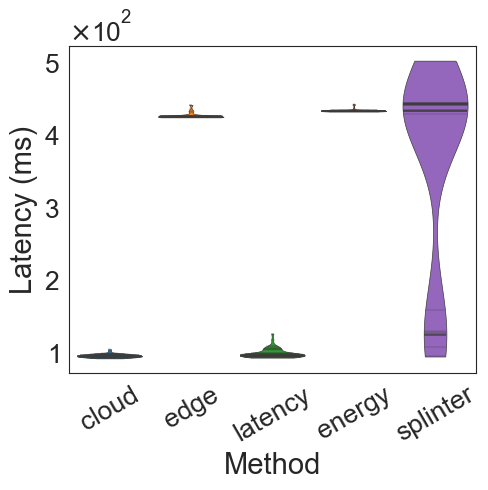

In [15]:


# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['cloud', 'edge', 'latency', 'energy', 'splinter']
palette_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='latency',
    data=data,
    ax=ax,
    inner='stick',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    saturation=1,
    linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('Latency (ms)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('latency_vgg16.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Energy

C:\Users\danie\AppData\Local\Temp\ipykernel_32876\240528324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


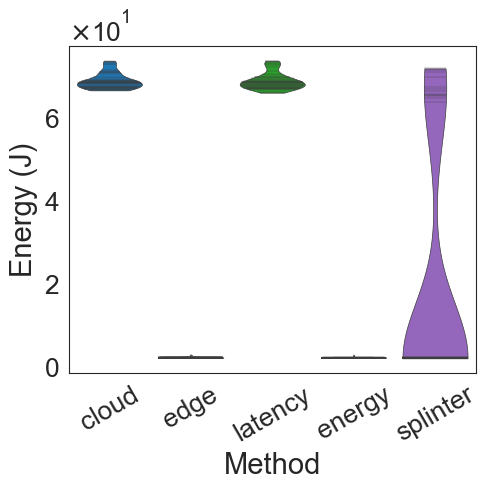

In [15]:
# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['cloud', 'edge', 'latency', 'energy', 'splinter']
palette_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='energy',
    data=data,
    ax=ax,
    inner='stick',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    saturation=1,
    linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('Energy (J)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('energy_vgg16.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Also alternative plot

# QoS violations

C:\Users\danie\AppData\Local\Temp\ipykernel_32876\2319045351.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='stick',
C:\Users\danie\AppData\Local\Temp\ipykernel_32876\2319045351.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(strategy_order, rotation=30, ha='center', fontsize=tick_font_size)


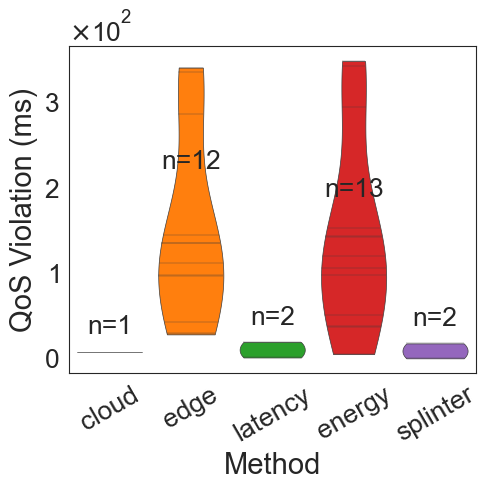

In [16]:
# Calculate violations and violation distributions
data['violation'] = data['latency'] - data['qos']
violation_data = data[data['violation'] > 0]

# Count the number of violations for each strategy
violation_counts = violation_data['strategy'].value_counts()

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the violation distribution as a violin plot in the specified order
sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='stick',
               order=strategy_order,
               cut=0,
               density_norm='width',
               palette=palette_colors,
               saturation=1,
               linewidth=0.5, )

# Add annotation for the number of violations with adjusted positions
for i, strategy in enumerate(strategy_order):
    if strategy in violation_counts:
        count = violation_counts[strategy]
        # Define the position for the annotation based on the strategy
        if strategy in ['cloud', 'latency', 'splinter', 'splinter (exh.)']:
            # Place the text above the upper whisker
            max_violation = violation_data[violation_data['strategy'] == strategy]['violation'].max()
            position = max_violation + 20
        else:
            # Calculate the IQR and place the text between the upper box edge and the upper whisker for 'edge' and 'energy'
            q1 = violation_data[violation_data['strategy'] == strategy]['violation'].quantile(0.25)

            q3 = violation_data[violation_data['strategy'] == strategy]['violation'].quantile(0.75)
            iqr = q3 - q1
            upper_whisker = q3 + 1.5 * iqr
            position = q3 + (upper_whisker - q3) / 2
            if strategy == 'edge':
                position = position - 30
            else:
                position = position - 40

        ax.text(i, position, f'n={count}', ha='center', fontsize=tick_font_size)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('QoS Violation (ms)', fontsize=label_font_size)
ax.set_xticklabels(strategy_order, rotation=30, ha='center', fontsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)

# Use scientific notation for the y-axis
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axis
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and display the plot
fig.tight_layout()
plt.savefig('violation_vgg16.pdf', format='pdf', bbox_inches='tight')
plt.show()